In [18]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pillow
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install plaidml-keras  # For Mac GPUs only
!{sys.executable} -m pip install sklearn
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
# os.environ['KERAS_BACKEND'] = 'plaidml.keras.backend'
from PIL import Image
print(os.listdir("./data"))

# Keras Libraries
import plaidml.keras  # For Mac GPUs only
plaidml.keras.install_backend()  # For Mac GPUs only
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

['.DS_Store', 'chest_xray']


In [19]:
def createModel():
    cnn = Sequential()

    # Convolutional Layer
    cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))

    # Pooling Layer
    cnn.add(MaxPooling2D(pool_size = (2,2)))

    # 2nd Convolutional Layer
    cnn.add(Conv2D(32, (3,3), activation='relu'))

    # 2nd Pooling Layer
    cnn.add(MaxPooling2D(pool_size = (2,2)))

    #Flatten Layers
    cnn.add(Flatten())

    #Fully Connected Layers
    cnn.add(Dense(activation = 'relu', units = 128))
    cnn.add(Dense(activation = 'sigmoid', units = 1))

    # Compile CNN
    cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', 
                metrics = ['accuracy'])
    return cnn

In [20]:
cnn = createModel()
weights_path = './cnn_pneumonia_model.h5'
cnn.load_weights(weights_path)

In [21]:
train_folder = './data/chest_xray/train/'
val_folder = './data/chest_xray/val/'
test_folder = './data/chest_xray/test/'
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [44]:
# Fit CNN to Images

# Training image normalization settings
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Test/Validation image normalization settings
test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_folder,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = None,
                                            shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [23]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total para

In [24]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

In [25]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 88.94309778142974 %


In [27]:
print(test_accu, cnn.metrics_names)

[0.3666501262959096, 0.8894309778142975] ['loss', 'acc']


In [45]:
predictions = cnn.predict_generator(test_set, verbose=1)

20/20 [==============================] - 6s 302ms/step


In [46]:
print(len(predictions))

624


In [53]:
y_true = test_set.classes
y_pred = np.around(predictions)
y_pred = y_pred.astype(int)
print(y_true)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [55]:
confusion_matrix(y_true, y_pred)
print(confusion_matrix)
class_names = list(test_set.class_indices.keys())

<function confusion_matrix at 0x1a23bb87b8>


Confusion matrix, without normalization
[[175  59]
 [ 10 380]]
Normalized confusion matrix
[[0.75 0.25]
 [0.03 0.97]]


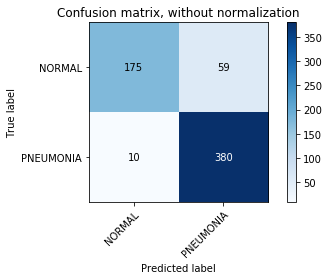

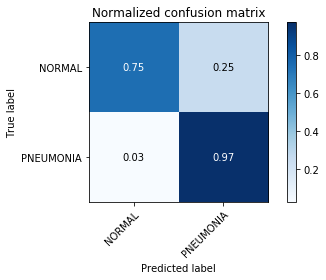

In [58]:
# Adapted from SciKit documentation 

from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [59]:
print(classification_report(test_set.classes, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      NORMAL       0.95      0.75      0.84       234
   PNEUMONIA       0.87      0.97      0.92       390

   micro avg       0.89      0.89      0.89       624
   macro avg       0.91      0.86      0.88       624
weighted avg       0.90      0.89      0.89       624

